In [52]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix


RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=True,
                          title=None,
                          cmap=plt.cm.Greens, save_to_file = False):
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        #print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    #print(cm)

    fig, ax = plt.subplots(figsize = (9,9))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    # ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    if save_to_file:
        plt.savefig(title + '.png')
    return ax

In [53]:
database = pd.read_csv(r"../../data/metadata.csv")

database[['smoke','drink','pesticide','skin_cancer_history','cancer_history','has_piped_water','has_sewage_system','itch','grew','hurt','changed','bleed','elevation','biopsed']] = database[['smoke','drink','pesticide','skin_cancer_history','cancer_history','has_piped_water','has_sewage_system','itch','grew','hurt','changed','bleed','elevation','biopsed']].astype("bool")

database = database.dropna().drop(['patient_id','lesion_id','img_id'], axis = 1)

database.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1474 entries, 1 to 2296
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   smoke                1474 non-null   bool   
 1   drink                1474 non-null   bool   
 2   background_father    1474 non-null   object 
 3   background_mother    1474 non-null   object 
 4   age                  1474 non-null   int64  
 5   pesticide            1474 non-null   bool   
 6   gender               1474 non-null   object 
 7   skin_cancer_history  1474 non-null   bool   
 8   cancer_history       1474 non-null   bool   
 9   has_piped_water      1474 non-null   bool   
 10  has_sewage_system    1474 non-null   bool   
 11  fitspatrick          1474 non-null   float64
 12  region               1474 non-null   object 
 13  diameter_1           1474 non-null   float64
 14  diameter_2           1474 non-null   float64
 15  diagnostic           1474 non-null   o

# Data Exploration

In [54]:
df = database.copy()

df.head()

,smoke,drink,background_father,background_mother,age,pesticide,gender,skin_cancer_history,cancer_history,has_piped_water,...,diameter_1,diameter_2,diagnostic,itch,grew,hurt,changed,bleed,elevation,biopsed
1,False,False,POMERANIA,POMERANIA,55,False,FEMALE,True,True,True,...,6.0,5.0,BCC,True,True,True,True,True,True,True
4,False,True,POMERANIA,POMERANIA,79,False,MALE,True,False,False,...,5.0,5.0,BCC,True,True,True,True,True,True,True
6,False,True,GERMANY,ITALY,52,False,FEMALE,False,True,True,...,15.0,10.0,BCC,True,True,True,True,True,True,True
7,False,False,POMERANIA,POMERANIA,74,True,FEMALE,False,False,False,...,15.0,10.0,BCC,True,True,True,True,True,True,True
9,False,True,GERMANY,GERMANY,58,True,FEMALE,True,True,True,...,9.0,7.0,ACK,True,True,True,True,True,True,False


In [55]:
df['region'] = df['region'].apply(lambda x: 'OUTROS' if x in ['THIGH','LIP','FOOT','ABDOMEN','SCALP'] else x)
df['background_father'] = df['background_father'].apply(lambda x: 'OUTROS' if x in ['ISRAEL','SPAIN','AUSTRIA','CZECH','BRASIL','POLAND','PORTUGAL','NETHERLANDS','NORWAY','FRANCE'] else ('BRAZIL' if x == 'BRASIL' else x))
df['background_mother'] = df['background_mother'].apply(lambda x: 'OUTROS' if x in ['ISRAEL','SPAIN','AUSTRIA','CZECH','BRASIL','POLAND','PORTUGAL','NETHERLANDS','NORWAY','FRANCE'] else ('BRAZIL' if x == 'BRASIL' else x))

df['is_cancer'] = df['diagnostic'].apply(lambda x: 0 if x in ['ACK','NEV','SEK'] else 1)

df.head()

,smoke,drink,background_father,background_mother,age,pesticide,gender,skin_cancer_history,cancer_history,has_piped_water,...,diameter_2,diagnostic,itch,grew,hurt,changed,bleed,elevation,biopsed,is_cancer
1,False,False,POMERANIA,POMERANIA,55,False,FEMALE,True,True,True,...,5.0,BCC,True,True,True,True,True,True,True,1
4,False,True,POMERANIA,POMERANIA,79,False,MALE,True,False,False,...,5.0,BCC,True,True,True,True,True,True,True,1
6,False,True,GERMANY,ITALY,52,False,FEMALE,False,True,True,...,10.0,BCC,True,True,True,True,True,True,True,1
7,False,False,POMERANIA,POMERANIA,74,True,FEMALE,False,False,False,...,10.0,BCC,True,True,True,True,True,True,True,1
9,False,True,GERMANY,GERMANY,58,True,FEMALE,True,True,True,...,7.0,ACK,True,True,True,True,True,True,False,0


In [56]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer

transformer = make_column_transformer((OneHotEncoder(categories='auto'), ['region','gender']), remainder='passthrough')

transformed = transformer.fit_transform(df.drop(['biopsed','background_father','background_mother'], axis = 1))

transformed_df = pd.DataFrame(transformed, columns=transformer.get_feature_names())

transformed_df.head()

/home/cedip/.local/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,onehotencoder__x0_ARM,onehotencoder__x0_BACK,onehotencoder__x0_CHEST,onehotencoder__x0_EAR,onehotencoder__x0_FACE,onehotencoder__x0_FOREARM,onehotencoder__x0_HAND,onehotencoder__x0_NECK,onehotencoder__x0_NOSE,onehotencoder__x0_OUTROS,...,diameter_1,diameter_2,diagnostic,itch,grew,hurt,changed,bleed,elevation,is_cancer
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,6.0,5.0,BCC,True,True,True,True,True,True,1
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,5.0,5.0,BCC,True,True,True,True,True,True,1
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,15.0,10.0,BCC,True,True,True,True,True,True,1
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,15.0,10.0,BCC,True,True,True,True,True,True,1
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,9.0,7.0,ACK,True,True,True,True,True,True,0


# Train Test Split

In [71]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(
    transformed_df.drop(['is_cancer', 'diagnostic'], axis=1),
    transformed_df['diagnostic'],
    test_size = 0.2,
    random_state=RANDOM_SEED,
)

x_train_bin, x_test_bin, y_train_bin, y_test_bin = train_test_split(
    transformed_df.drop(['is_cancer', 'diagnostic'], axis=1),
    transformed_df['is_cancer'],
    test_size = 0.2,
    random_state=RANDOM_SEED,
)
y_train_bin = y_train_bin.astype(np.float64)
y_test_bin = y_test_bin.astype(np.float64)

print(f"{x_train.shape=}")
print(f"{x_test.shape=}")
print(f"{y_train.shape=}")
print(f"{y_test.shape=}")
print(f"{x_train_bin.shape=}")
print(f"{x_test_bin.shape=}")
print(f"{y_train_bin.shape=}")
print(f"{y_test_bin.shape=}")

x_train.shape=(1179, 29)
x_test.shape=(295, 29)
y_train.shape=(1179,)
y_test.shape=(295,)
x_train_bin.shape=(1179, 29)
x_test_bin.shape=(295, 29)
y_train_bin.shape=(1179,)
y_test_bin.shape=(295,)


# Predict

In [75]:
def eval_model(model, x_test, y_test, title, *, classes=None):
    y_pred = model.predict(x_test)
    y_pred_proba = model.predict_proba(x_test)[:,1]
    if classes:
        classes_list = classes
    else:
        classes_list = list(set(y_test))
    plot_confusion_matrix(y_test, y_pred, classes_list, normalize=True, title=title, cmap="Blues", save_to_file=True)

# Logistic Regression

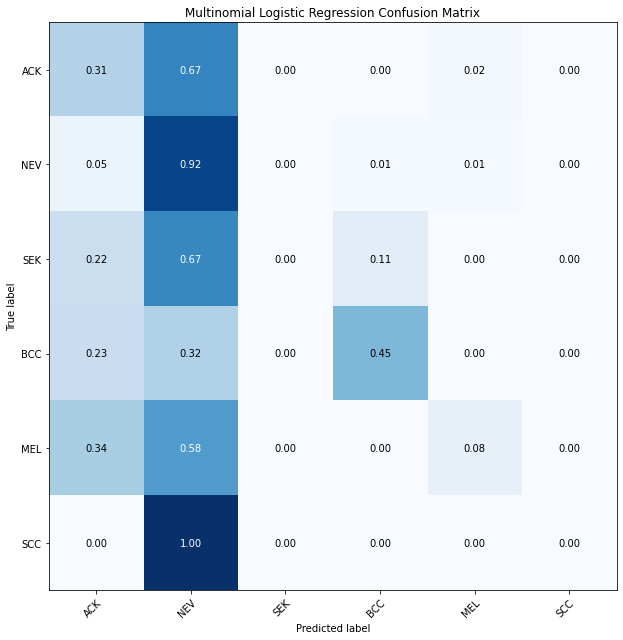

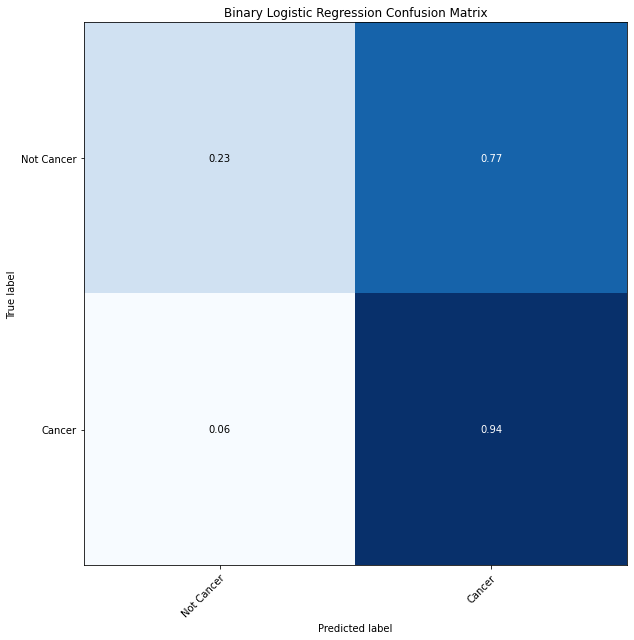

In [76]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score
from sklearn import metrics

log_reg = LogisticRegression(random_state=RANDOM_SEED, max_iter=1e5)
log_reg.fit(x_train, y_train)
eval_model(log_reg, x_test, y_test, title="Multinomial Logistic Regression Confusion Matrix")

log_reg_bin = LogisticRegression(random_state=RANDOM_SEED, max_iter=1e5)
log_reg_bin.fit(x_train_bin, y_train_bin)
eval_model(log_reg_bin, x_test_bin, y_test_bin, title="Binary Logistic Regression Confusion Matrix", classes=["Not Cancer", "Cancer"])


# Random Forest Classifier

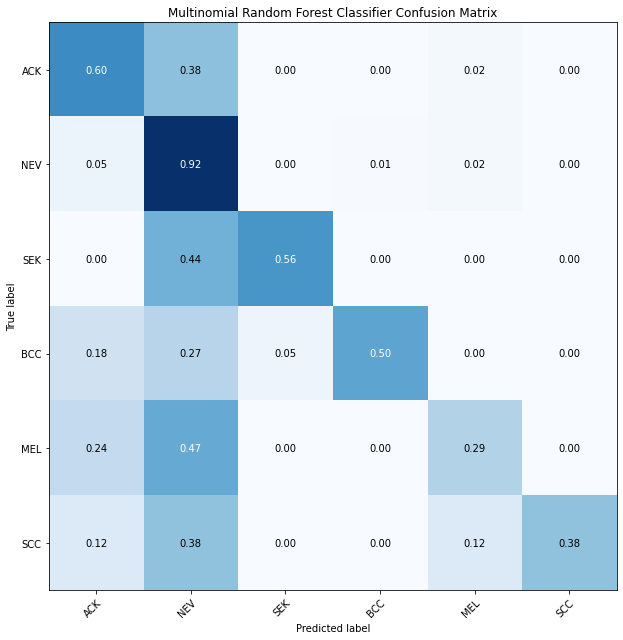

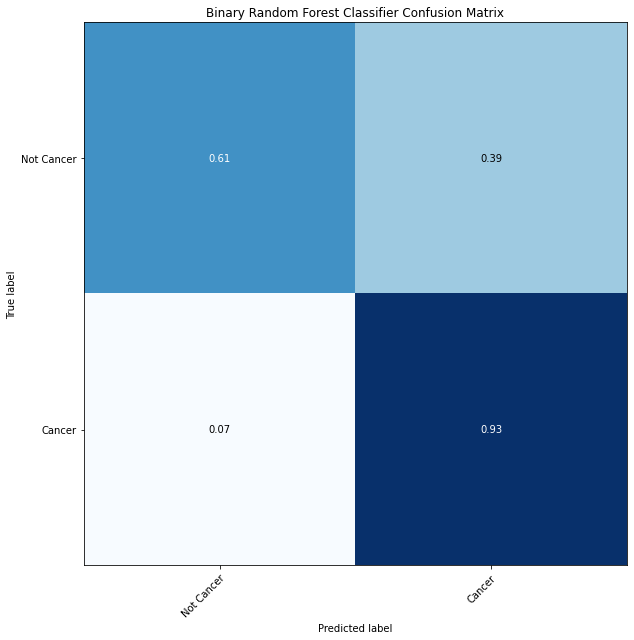

In [77]:
from sklearn.ensemble import RandomForestClassifier

rfc_clf = RandomForestClassifier(random_state=RANDOM_SEED, n_estimators=150)
rfc_clf.fit(x_train, y_train)
eval_model(rfc_clf, x_test, y_test, title="Multinomial Random Forest Classifier Confusion Matrix")

rfc_clf_bin = RandomForestClassifier(random_state=RANDOM_SEED, n_estimators=150)
rfc_clf_bin.fit(x_train_bin, y_train_bin)
eval_model(rfc_clf_bin, x_test_bin, y_test_bin, title="Binary Random Forest Classifier Confusion Matrix", classes=["Not Cancer", "Cancer"])

# XGBoost

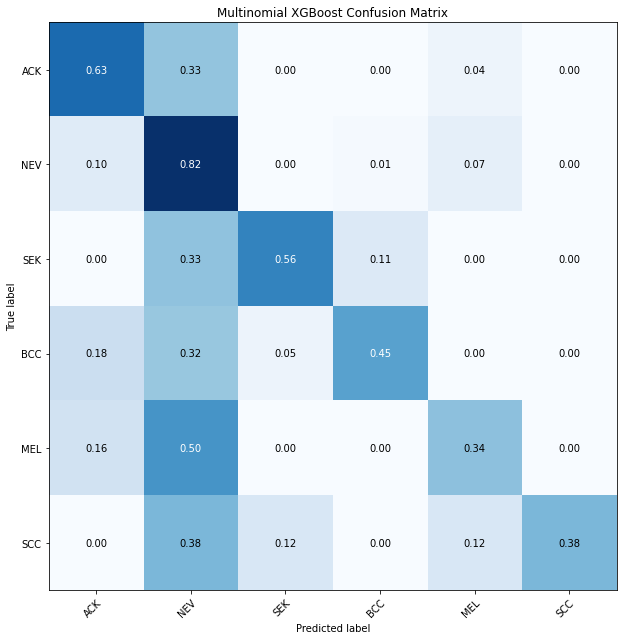

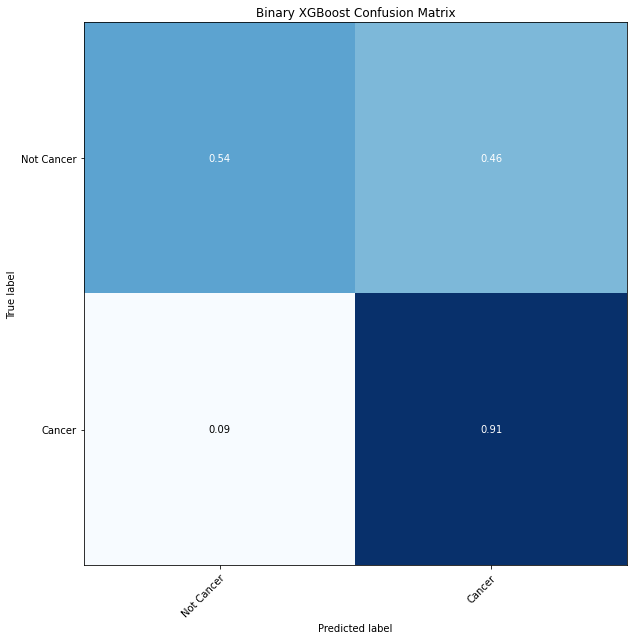

In [79]:
from xgboost import XGBClassifier
from sklearn.preprocessing import OrdinalEncoder

xgb_encoder = OrdinalEncoder()
sgb_clf = XGBClassifier(random_state=RANDOM_SEED, n_estimators=110, eval_metric='auc')
sgb_clf.fit(x_train.astype(np.float64), xgb_encoder.fit_transform(y_train.to_numpy().reshape(-1,1)))
y_pred = sgb_clf.predict(x_test.astype(np.float64))
y_pred_proba = sgb_clf.predict_proba(x_test.astype(np.float64))[:,1]
plot_confusion_matrix(y_test, xgb_encoder.inverse_transform(y_pred.reshape(-1,1)), list(set(y_test)), normalize=True, title="Multinomial XGBoost Confusion Matrix", cmap="Blues", save_to_file=True);

sgb_clf_bin = XGBClassifier(random_state=RANDOM_SEED, n_estimators=110, eval_metric='auc')
sgb_clf_bin.fit(x_train_bin.astype(np.float64), y_train_bin.to_numpy().reshape(-1,1)) 
y_pred = sgb_clf_bin.predict(x_test_bin.astype(np.float64))
y_pred_proba = sgb_clf_bin.predict_proba(x_test_bin.astype(np.float64))[:,1]
plot_confusion_matrix(y_test_bin, y_pred.reshape(-1,1), ["Not Cancer", "Cancer"], normalize=True, title="Binary XGBoost Confusion Matrix", cmap="Blues", save_to_file=True);

In [62]:
y_train.value_counts(normalize=True)

BCC    0.575912
ACK    0.187447
SCC    0.130619
NEV    0.042409
MEL    0.036472
SEK    0.027142
Name: diagnostic, dtype: float64